Tsask 20
Regression Example

In [12]:
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [14]:
# Normalize the features
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [15]:
# Define the model
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [20]:
# Define the number of folds
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

In [21]:
#  K-fold validation

# Train the model using K-fold cross-validation
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
        validation_data=(val_data, val_targets),
        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
# Compute the average validation score for each epoch
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

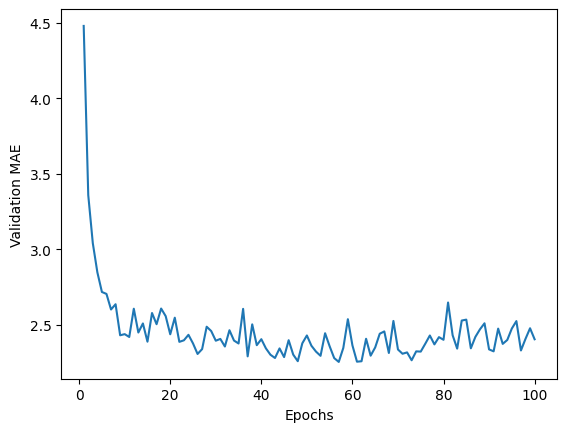

In [23]:
# Plot the validation score
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

This code loads the Boston Housing dataset, normalizes the features,
 defines a model with three fully connected layers, trains the model using K-fold cross-validation, 
 and plots the validation mean absolute error (MAE) for each epoch.